In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import eda_helper_functions


In [2]:
## Reading train data

train = pd.read_csv(r"C:\Users\yashg\OneDrive\Desktop\flight-sagemaker\data\train.csv")

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration_in_minute,Price
0,IndiGo,2019-06-24,Delhi,Cochin,05:05:00,16:10:00,1,665,6442
1,Vistara,2019-06-06,Chennai,Kolkata,07:05:00,09:20:00,0,135,3687
2,Air India,2019-05-06,Kolkata,Banglore,12:00:00,07:55:00,2,1195,10151
3,Air India,2019-06-24,Delhi,Cochin,17:15:00,19:15:00,2,1560,11989
4,IndiGo,2019-04-24,Kolkata,Banglore,11:30:00,14:05:00,0,155,4804


In [4]:
train.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Dep_Time              0
Arrival_Time          0
Total_Stops           0
Duration_in_minute    0
Price                 0
dtype: int64

In [5]:
train.dtypes

Airline               object
Date_of_Journey       object
Source                object
Destination           object
Dep_Time              object
Arrival_Time          object
Total_Stops            int64
Duration_in_minute     int64
Price                  int64
dtype: object

In [6]:
## Fizing datatypes

for col in ['Date_of_Journey', "Dep_Time", "Arrival_Time"]:
    train[col] = pd.to_datetime(train[col], dayfirst=True, format="mixed")

In [7]:
train.dtypes

Airline                       object
Date_of_Journey       datetime64[ns]
Source                        object
Destination                   object
Dep_Time              datetime64[ns]
Arrival_Time          datetime64[ns]
Total_Stops                    int64
Duration_in_minute             int64
Price                          int64
dtype: object

### High-level Summary of Data

In [9]:
train.describe(include=[int,float])

,Total_Stops,Duration_in_minute,Price
count,5760.000000,5760.000000,5760.000000
mean,0.796354,628.159722,8993.274479
std,0.664915,500.872349,4518.919357
min,0.000000,75.000000,1759.000000
25%,0.000000,170.000000,5223.250000
50%,1.000000,500.000000,8220.000000
75%,1.000000,915.000000,12297.000000
max,4.000000,2525.000000,54826.000000


In [10]:
train.assign(total_stops=train["Total_Stops"].astype(object)).describe(include="O")

,Airline,Source,Destination,total_stops
count,5760,5760,5760,5760
unique,9,5,5,5
top,Jet Airways,Delhi,Cochin,1
freq,2021,2411,2411,3061


### High-level analysis of Outliers

In [12]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [13]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="Price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration_in_minute,Price,outlier
1,Vistara,2019-06-06,Chennai,Kolkata,2024-10-05 07:05:00,2024-10-05 09:20:00,0,135,3687,-1
2,Air India,2019-05-06,Kolkata,Banglore,2024-10-05 12:00:00,2024-10-05 07:55:00,2,1195,10151,-1
3,Air India,2019-06-24,Delhi,Cochin,2024-10-05 17:15:00,2024-10-05 19:15:00,2,1560,11989,-1
5,IndiGo,2019-03-15,Delhi,Cochin,2024-10-05 05:35:00,2024-10-05 08:50:00,0,195,5406,-1
6,SpiceJet,2019-03-03,Kolkata,Banglore,2024-10-05 17:15:00,2024-10-05 19:45:00,0,150,6251,-1
...,...,...,...,...,...,...,...,...,...,...
5749,Air India,2019-03-27,Delhi,Cochin,2024-10-05 21:30:00,2024-10-05 19:15:00,2,1305,8665,-1
5750,Air India,2019-06-01,Chennai,Kolkata,2024-10-05 11:40:00,2024-10-05 13:55:00,0,135,4667,-1
5755,IndiGo,2019-06-03,Mumbai,Hyderabad,2024-10-05 21:20:00,2024-10-05 22:50:00,0,90,2227,-1
5757,Jet Airways,2019-06-09,Delhi,Cochin,2024-10-05 19:15:00,2024-10-05 19:00:00,1,1425,10577,-1


### Pair plots

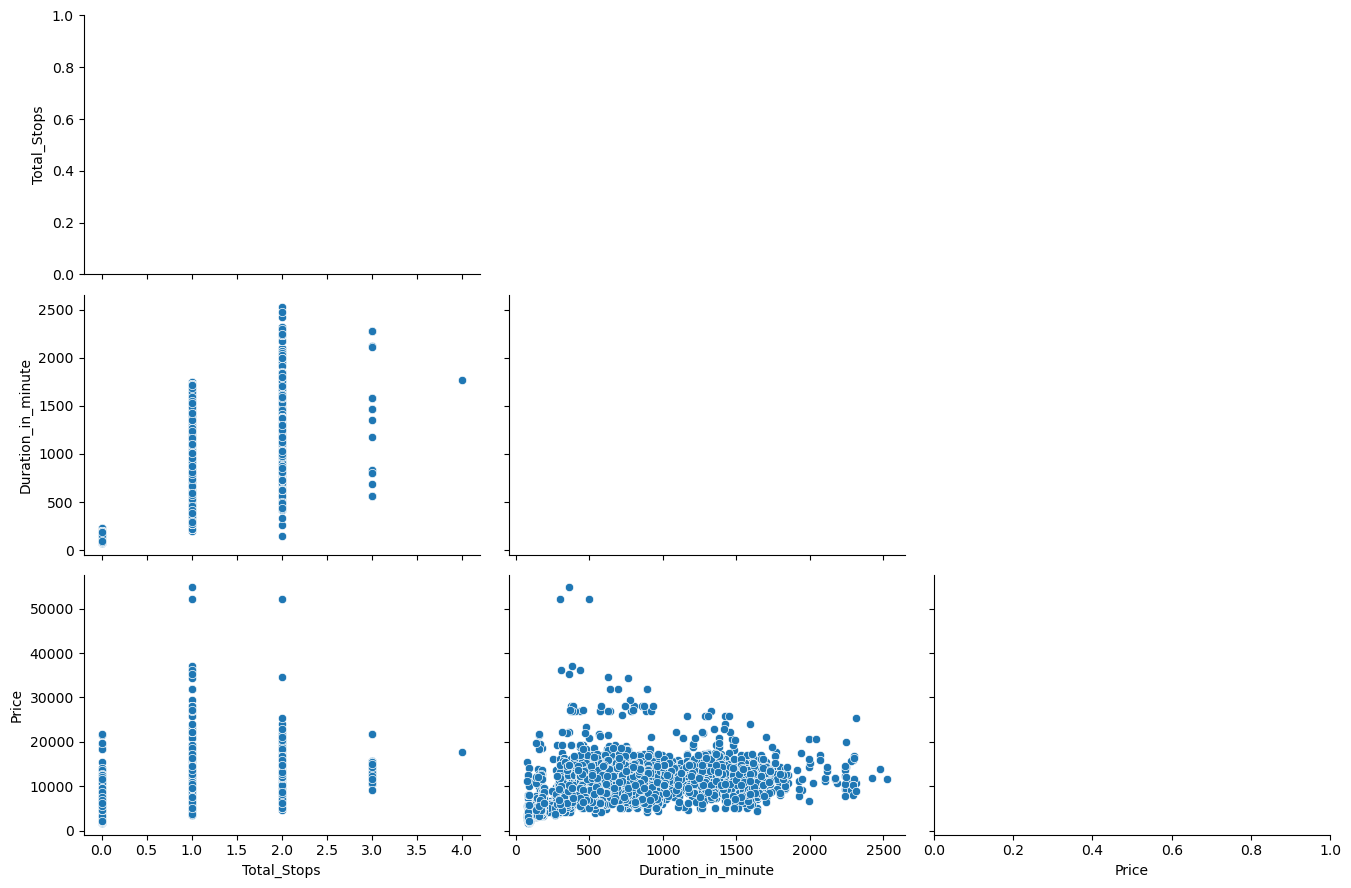

In [15]:
eda_helper_functions.pair_plots(train,)

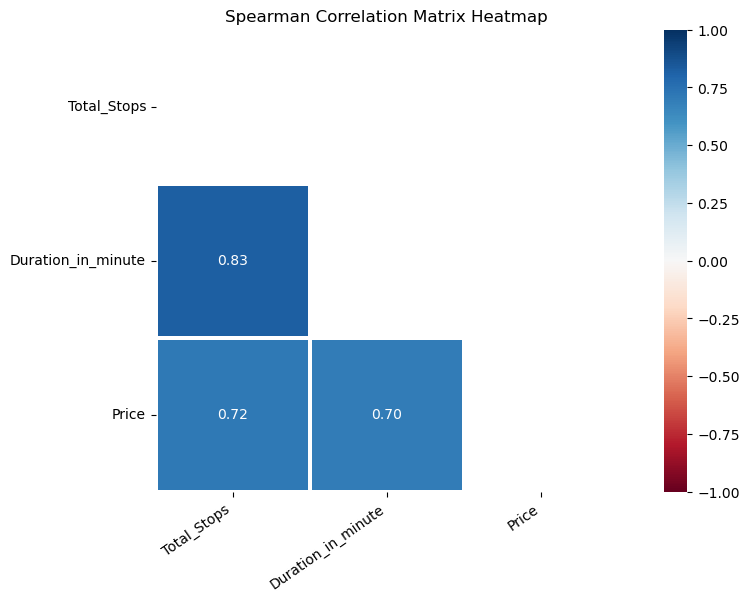

In [16]:
eda_helper_functions.correlation_heatmap(train)

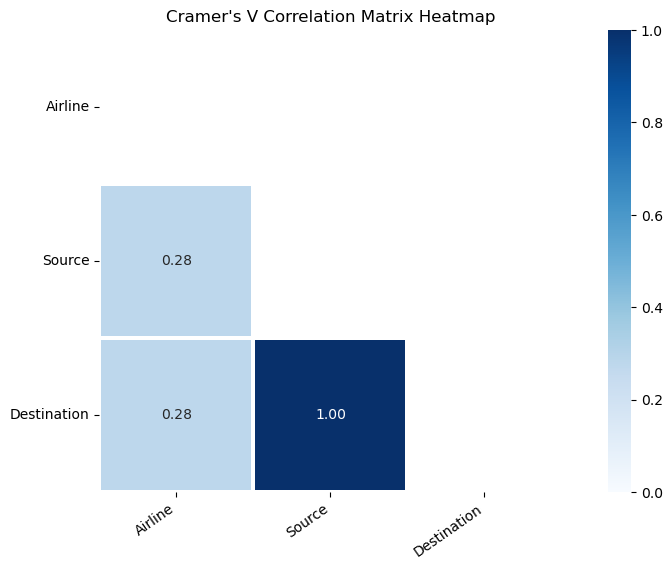

In [17]:
eda_helper_functions.cramersV_heatmap(train)

## Detailed Aalysis

In [19]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Total_Stops', 'Duration_in_minute', 'Price'],
      dtype='object')

### 8.1 Airline

In [21]:
eda_helper_functions.cat_summary(train,"Airline")

0            IndiGo
1           Vistara
2         Air India
3         Air India
4            IndiGo
           ...     
5755         IndiGo
5756    Jet Airways
5757    Jet Airways
5758        Vistara
5759    Jet Airways
Name: Airline, Length: 5760, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,760 / 5,760 rows


,
count,5760
unique,9
top,Jet Airways
freq,2021


,count,percentage
category,,
Jet Airways,2021,0.350868
IndiGo,1142,0.198264
Air India,915,0.158854
Multiple carriers,690,0.119792
SpiceJet,469,0.081424
Vistara,264,0.045833
Air Asia,155,0.026910
GoAir,103,0.017882
Trujet,1,0.000174


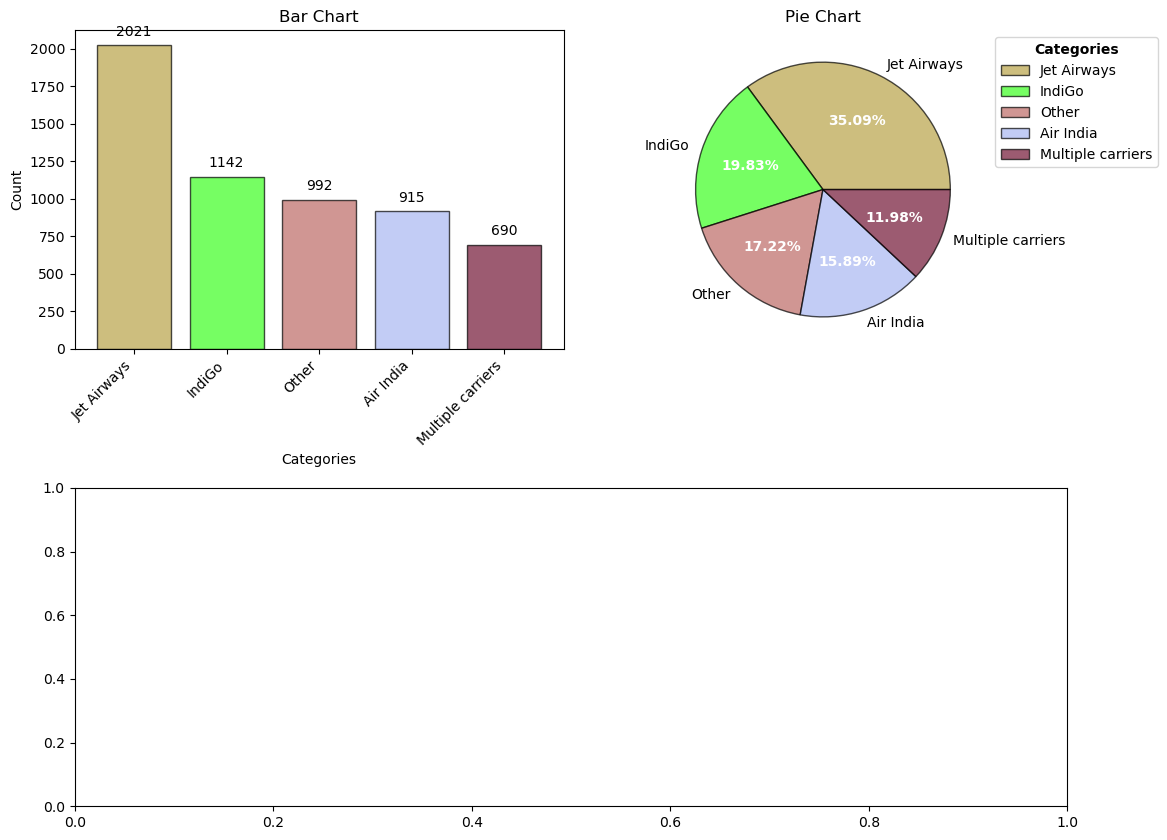

In [53]:
eda_helper_functions.cat_univar_plots(train,"Airline",show_wordcloud=False,k=4)

In [71]:
ff = train[["Price", "Airline"]]

In [77]:
ff.dropna(subset=["Price"]).groupby("Airline")


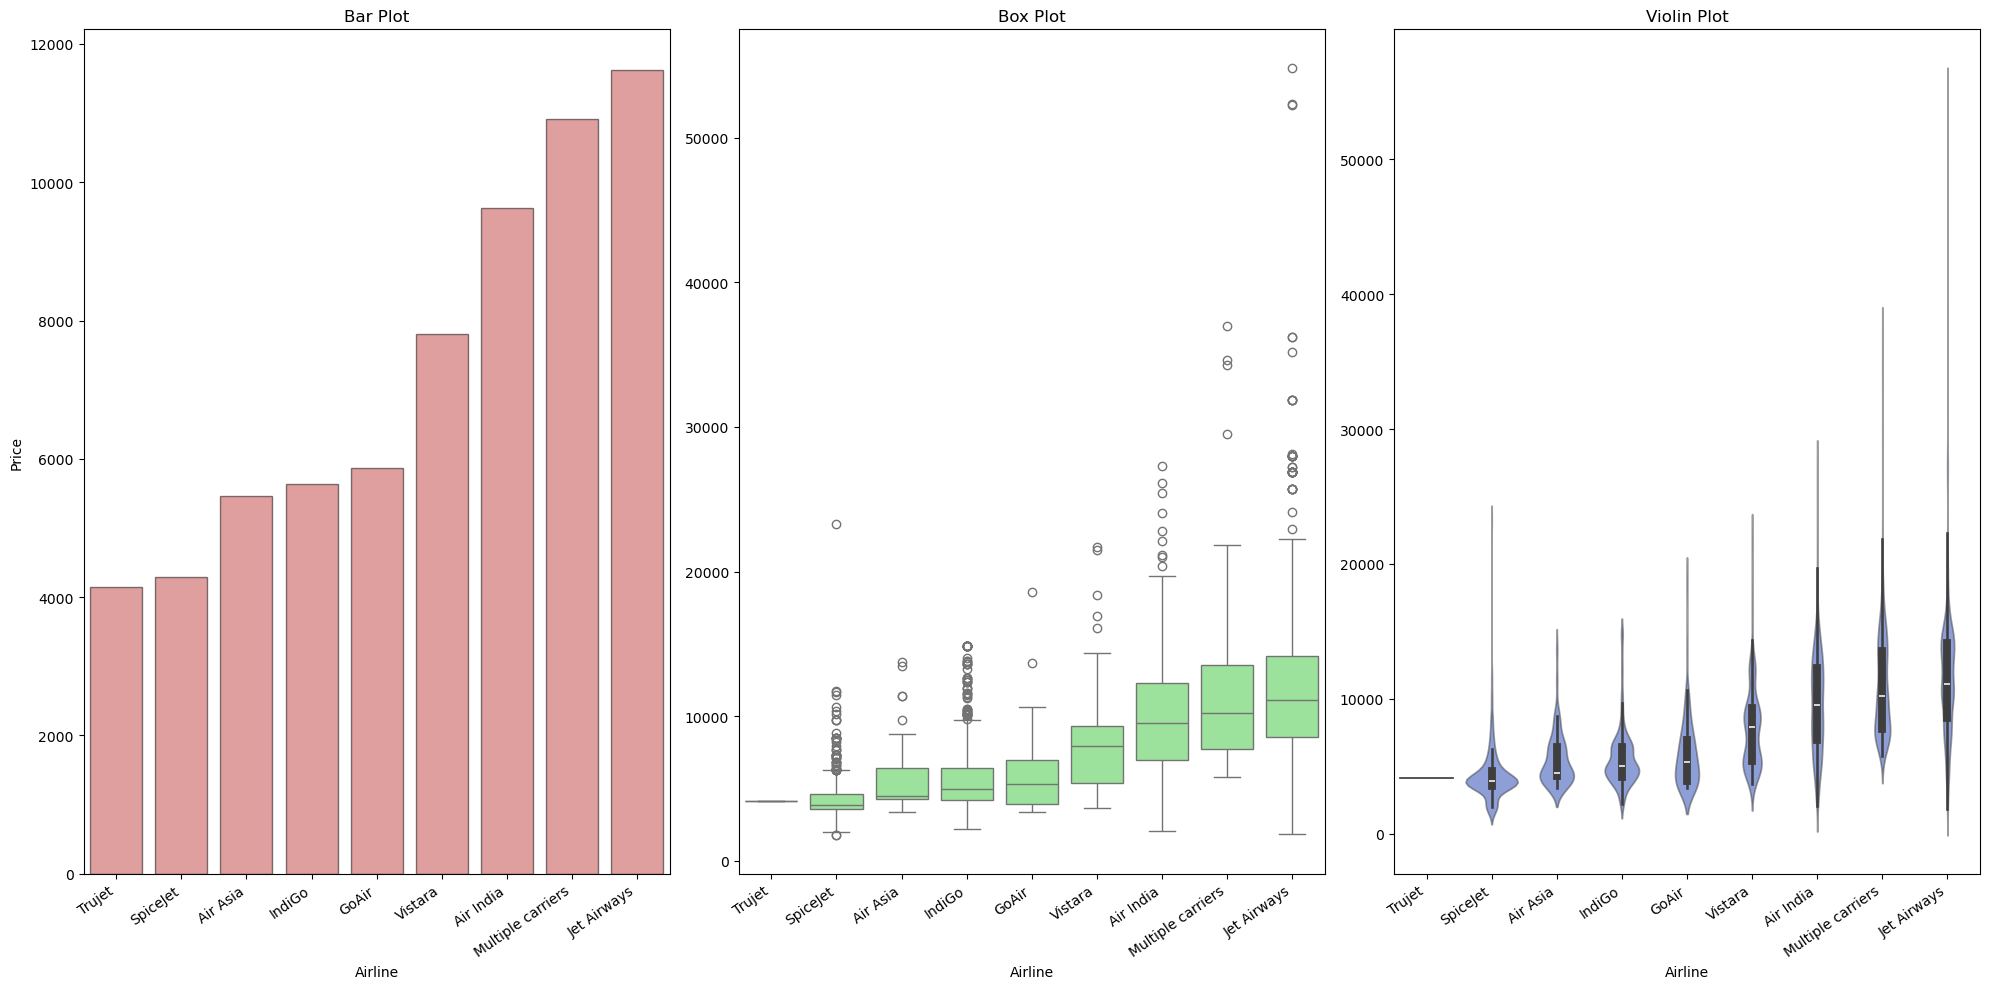

In [67]:
eda_helper_functions.num_cat_bivar_plots(train, num_var="Price", cat_var="Airline",figsize=(20, 10))

In [69]:
eda_helper_functions.num_cat_hyp_testing(train, "Price", "Airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 423.62575023588647
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Price and Airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2683.164431061716
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Price and Airline are associated to each other


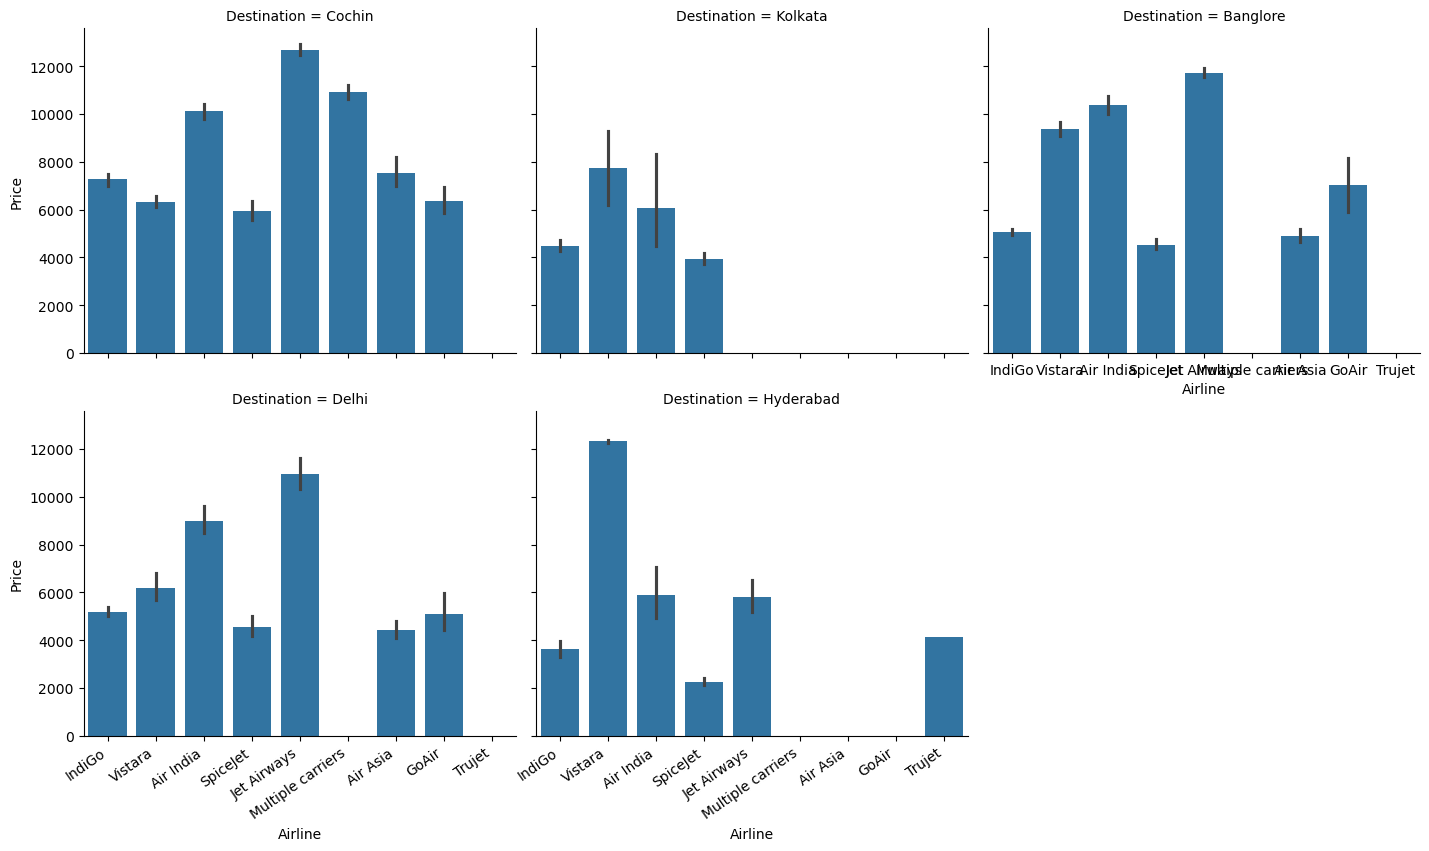

In [84]:
airline_grid = sns.FacetGrid(
	data=train,
	col="Destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "Airline", "Price", order=train.Airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### 3. Date_of_Journey 

In [88]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Total_Stops', 'Duration_in_minute', 'Price'],
      dtype='object')

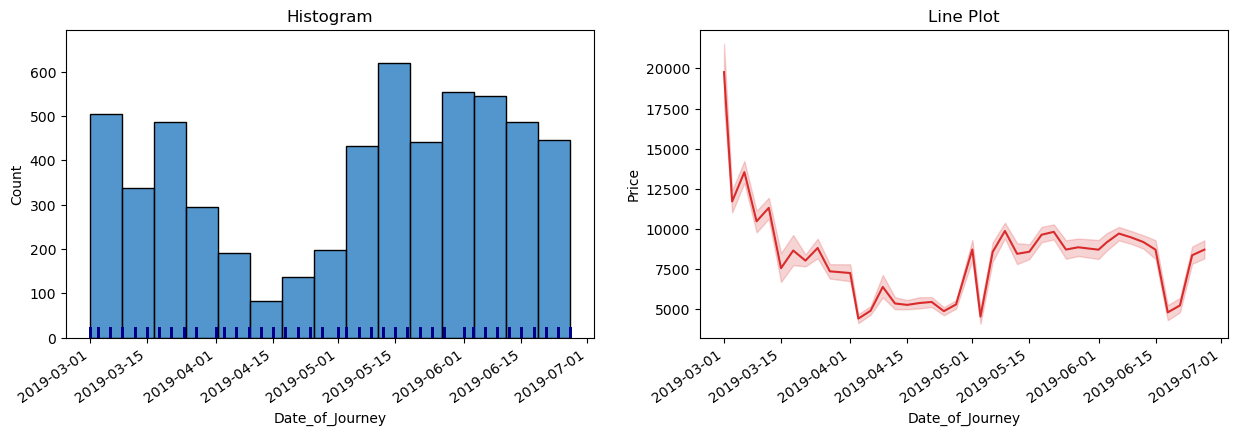

In [94]:
eda_helper_functions.dt_univar_plots(data = train, var="Date_of_Journey", target="Price")

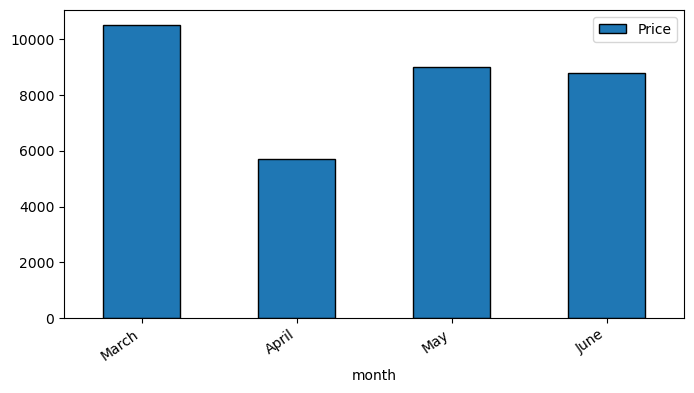

In [100]:
(
	train
	.groupby(pd.Grouper(key="Date_of_Journey", freq="M"))
	.Price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

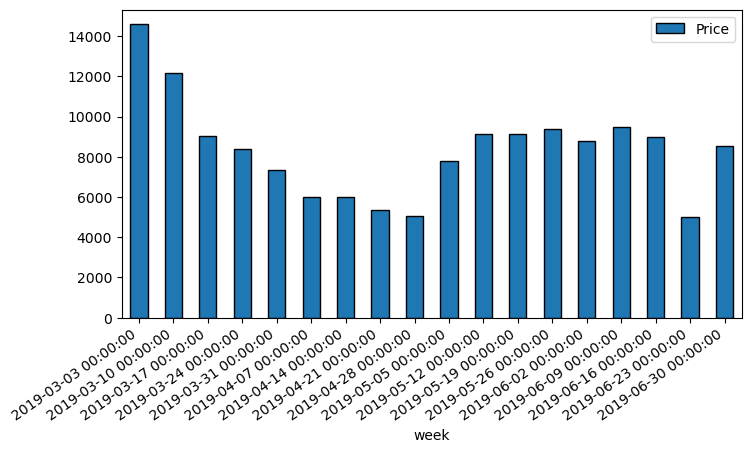

In [102]:
(
	train
	.groupby(pd.Grouper(key="Date_of_Journey", freq="W"))
	.Price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

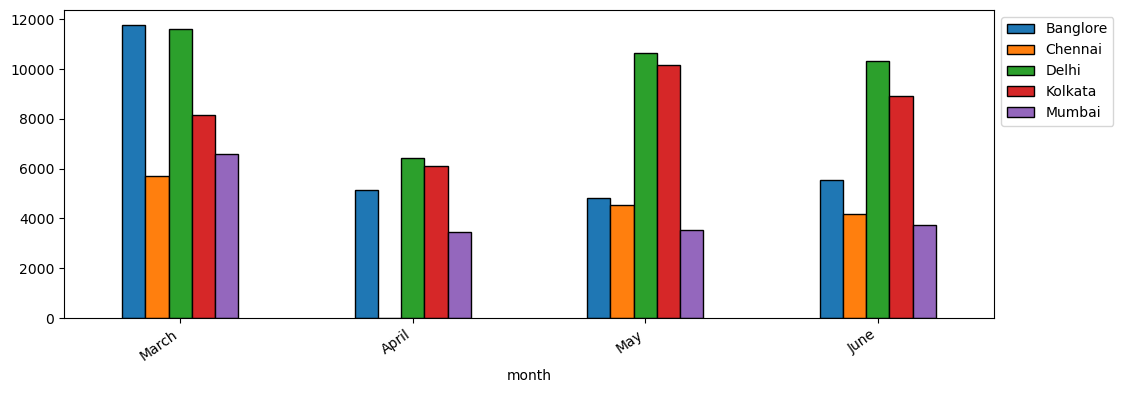

In [117]:
(
	train
	.groupby([pd.Grouper(key="Date_of_Journey", freq="M"), "Source"])
	.Price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

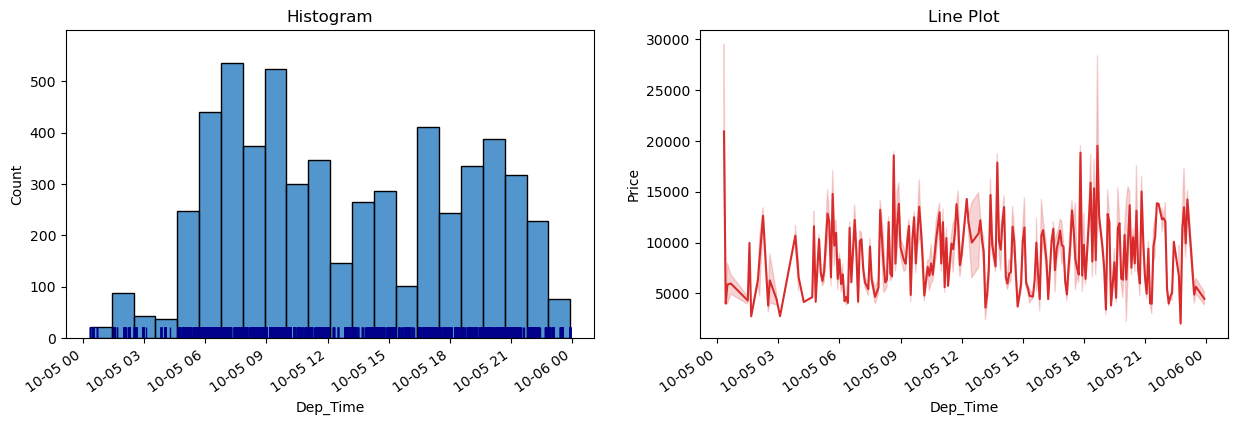

In [126]:
eda_helper_functions.dt_univar_plots(train, "Dep_Time", "Price")

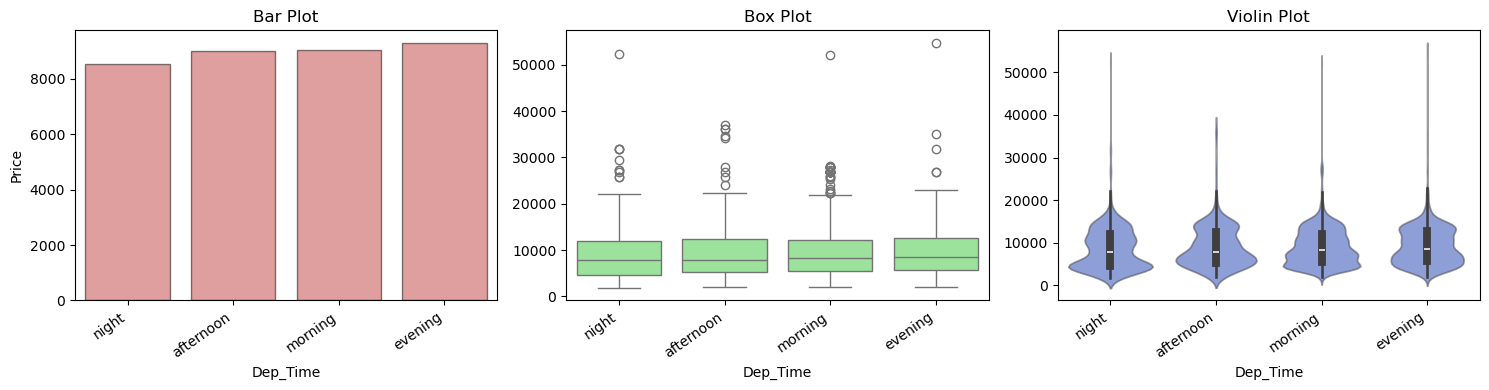

In [130]:
(
	train
	.assign(Dep_Time=lambda df_: (
		np.select([df_.Dep_Time.dt.hour.between(4, 12, inclusive="left"),
				   df_.Dep_Time.dt.hour.between(12, 16, inclusive="left"),
				   df_.Dep_Time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "Price", "Dep_Time")
)

### 8.4 Duration

In [135]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Total_Stops', 'Duration_in_minute', 'Price'],
      dtype='object')

In [137]:
eda_helper_functions.num_summary(train, "Duration_in_minute")

0        665
1        135
2       1195
3       1560
4        155
        ... 
5755      90
5756     590
5757    1425
5758     190
5759     875
Name: Duration_in_minute, Length: 5760, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 5,760 / 5,760 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,500.0
75,915.0
90,1440.0
95,1595.0
99,1855.0


,value
mean,628.159722
trimmed mean (5%),594.165702
trimmed mean (10%),564.937066
median,500.000000


,value
var,250873.110445
std,500.872349
IQR,745.000000
mad,332.500000
coef_variance,0.797365


,value
skewness,0.903976
kurtosis,-0.064402


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.8515756147191387e-54
Test Statistic       : 0.8835212310748951
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.786
Test Statistic       : 221.11078082712265
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


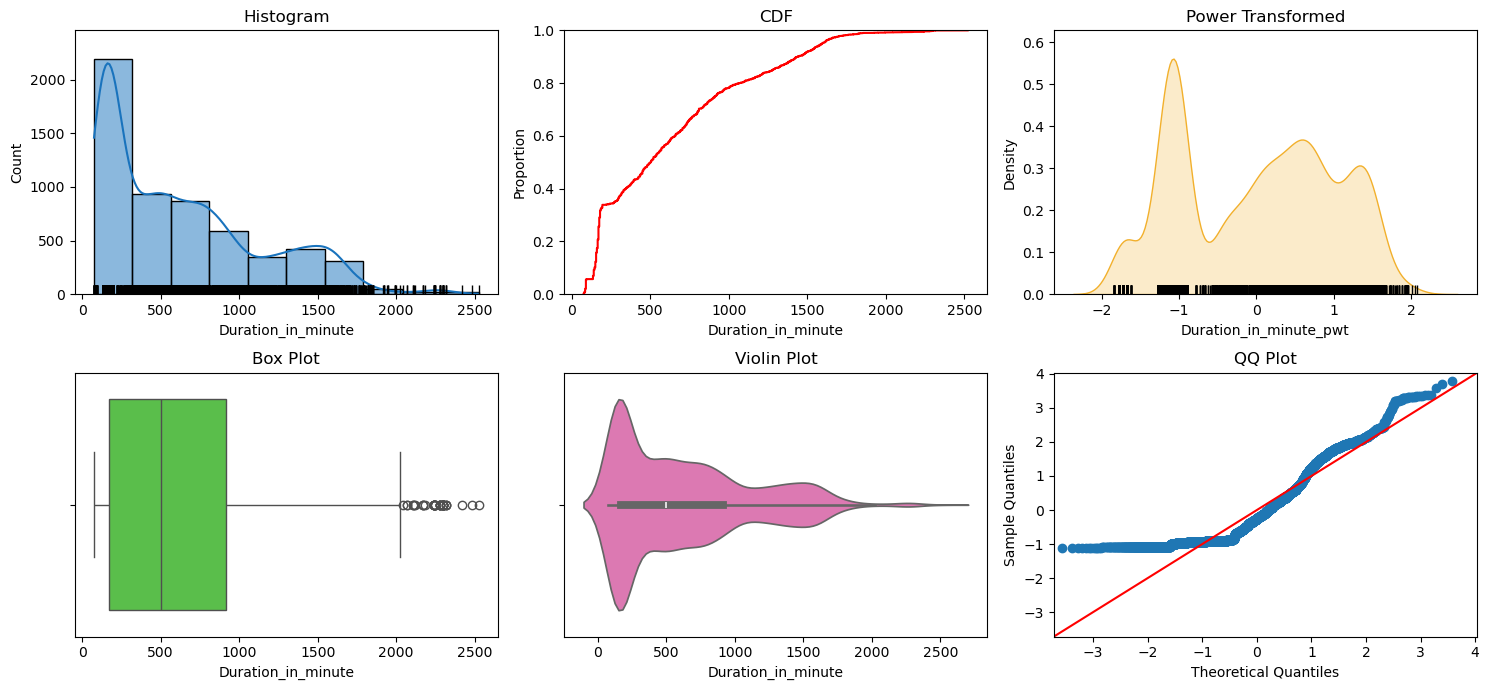

In [139]:
eda_helper_functions.num_univar_plots(train, "Duration_in_minute")

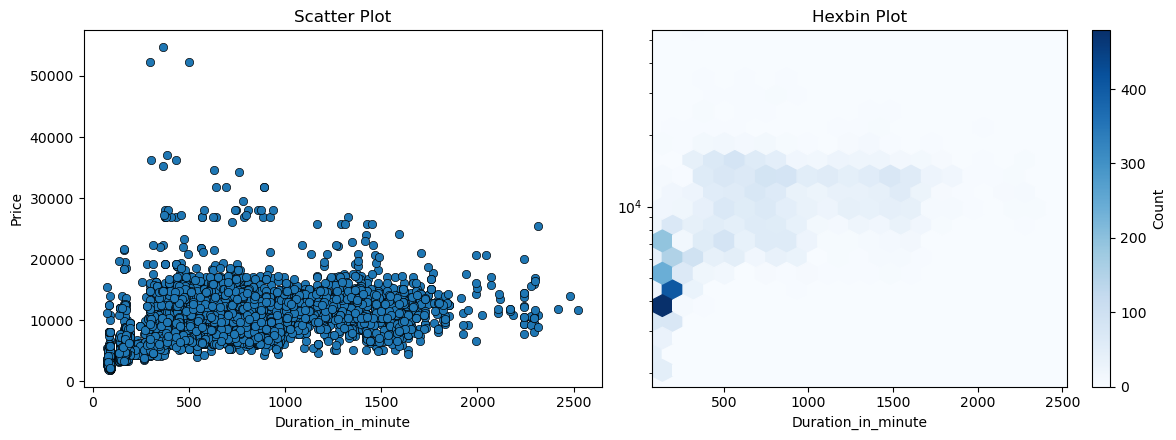

In [143]:
eda_helper_functions.num_bivar_plots(
	train,
	"Duration_in_minute",
	"Price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [147]:
eda_helper_functions.num_num_hyp_testing(train, "Price", "Duration_in_minute")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5173222006496899
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Price and Duration_in_minute are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7011053657832301
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Price and Duration_in_minute are correlated


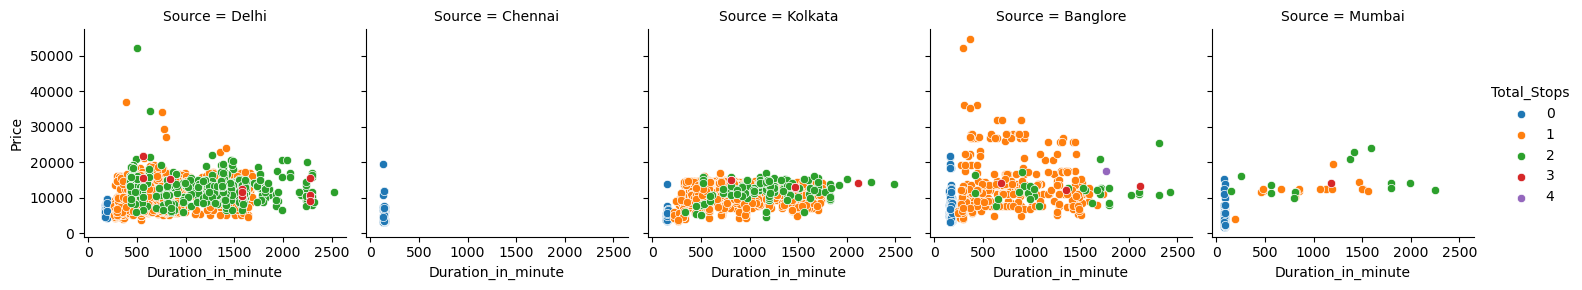

In [151]:
duration_grid = sns.FacetGrid(
	data=train,
	col="Source",
	hue="Total_Stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "Duration_in_minute", "Price")

duration_grid.add_legend()

In [153]:
eda_helper_functions.get_iqr_outliers(train, "Duration_in_minute")

Lower Limit : -947.5
Upper Limit : 2032.5


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration_in_minute,Price
3395,Jet Airways,2019-03-03,Delhi,Cochin,2024-10-05 18:20:00,2024-10-05 04:25:00,2,2045,20747
3122,Jet Airways,2019-03-06,Delhi,Cochin,2024-10-05 17:55:00,2024-10-05 04:25:00,2,2070,15812
2990,Jet Airways,2019-03-06,Delhi,Cochin,2024-10-05 17:55:00,2024-10-05 04:25:00,2,2070,17072
764,Air India,2019-03-03,Banglore,Delhi,2024-10-05 11:05:00,2024-10-05 22:10:00,2,2105,11791
729,Air India,2019-03-18,Banglore,Delhi,2024-10-05 11:05:00,2024-10-05 22:10:00,2,2105,11161
3578,Air India,2019-03-24,Kolkata,Banglore,2024-10-05 12:00:00,2024-10-05 23:15:00,3,2115,14221
1908,Air India,2019-03-12,Banglore,Delhi,2024-10-05 06:45:00,2024-10-05 18:05:00,3,2120,13387
2227,Air India,2019-03-03,Delhi,Cochin,2024-10-05 07:05:00,2024-10-05 19:15:00,2,2170,11762
2653,Air India,2019-03-06,Delhi,Cochin,2024-10-05 07:05:00,2024-10-05 19:15:00,2,2170,11552
3399,Air India,2019-03-09,Delhi,Cochin,2024-10-05 07:05:00,2024-10-05 19:15:00,2,2170,11762
